In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
!pip install slideio
import slideio
# slideio documentation: https://towardsdatascience.com/slideio-a-new-python-library-for-reading-medical-images-11858a522059

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download the dataset in the workspace:

In [4]:
## NOTA: decidere come vogliamo tenerlo, se da drive o da workspace. Per me il download su workspace è talmente veloce che va bene così
!gdown 1G54vsOdxWY1hG7dzmkeK3r0xz9s-heyQ -O /content/MoNuSAC_Testing_Data_and_Annotations.zip #download
!unzip /content/MoNuSAC_Testing_Data_and_Annotations.zip 

Downloading...
From: https://drive.google.com/uc?id=1G54vsOdxWY1hG7dzmkeK3r0xz9s-heyQ
To: /content/MoNuSAC_Testing_Data_and_Annotations.zip
100% 203M/203M [00:01<00:00, 156MB/s]


In [ ]:
try:
  os.mkdir('training_data')
except FileExistsError:
  print('Directory already exsists')

out_folder_name = '/content/training_data'
os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations')

# for folder_name in os.listdir():
#   os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations/' + str(folder_name))
#   for file_name in os.listdir():
#     if file_name.endswith('.tif'):
#       out_file_path = os.path.join(out_folder_name, file_name)
#       out_file_path = out_file_path.replace('.tif', '')
#       data= np.array(Image.open(file_name))
#       file = np.save(out_file_path, data)

for folder_name in os.listdir():
  os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations/' + str(folder_name))
  for file_name in os.listdir():
    if file_name.endswith('.svs'):
      out_file_path = os.path.join(out_folder_name, file_name)
      out_file_path = out_file_path.replace('.svs', '')
      slide = slideio.open_slide(file_name,"SVS")
      scene = slide.get_scene(0)
      image = scene.read_block(
          #size=(500,0) # un-comment to downscale the images
          )
      data = np.asarray(image)
      # file = np.save(out_file_path, data)

#### Analysing the files in the dataset

(766, 570, 3)

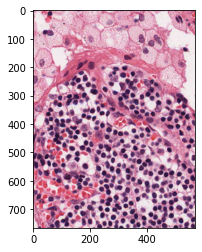

In [49]:
os.chdir(r'/content/drive/MyDrive/MoNuSAC_images_and_annotations/TCGA-86-8672-01Z-00-DX1')
# Opening and viewing an SVS file
filename = 'TCGA-86-8672-01Z-00-DX1_1.svs'
slide = slideio.open_slide(filename,"SVS")
scene = slide.get_scene(0)
image = scene.read_block(
    #size=(500,0)
    )
plt.imshow(image, cmap = 'gray')
image.shape

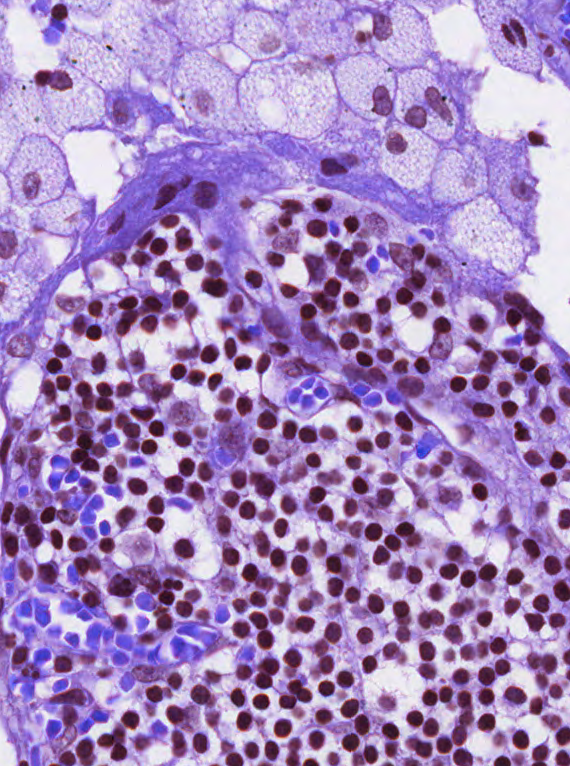

(3, 766, 570)

In [51]:
# Opening and viewing a TIF file
filename = 'TCGA-86-8672-01Z-00-DX1_1.tif'
im = Image.open(filename)
im.show()
# to numpy
tif_np=np.asarray(im)
tif_np = np.rollaxis(tif_np, 2, 0)[:-1]
tif_np.shape

We can observe how the image formats carry the same information so we can freely
choose which to use